In [1]:
# !pipreqsnb

# 1.PosteriorDB

In [2]:
from posteriordb import PosteriorDatabase
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pdb_path = "../posteriordb/posterior_database"
my_pdb = PosteriorDatabase(pdb_path)

In [4]:
posterior = my_pdb.posterior("kidiq-kidscore_momhsiq")

p_model = posterior.model
p_data = posterior.data

## 1.1. Accessing the data

In [5]:
p_data.information

{'name': 'kidiq',
 'keywords': ['ARM', 'Ch. 3', 'stan_examples'],
 'title': 'Cognitive test scores of three- and four-year-old children',
 'description': '  - N         : number of observations\n  - kid_score : cognitive test scores of three- and four-year-old children\n  - mom_hs    : did mother complete high school? 1: Yes, 0: No\n  - mom_iq    : mother IQ score\n  - mom_hs_new: new data for prediction\n  - mom_iq_new: new data for prediction',
 'urls': 'https://github.com/stan-dev/example-models/tree/master/ARM/Ch.3',
 'references': 'gelman2006data',
 'added_date': '2020-01-10',
 'added_by': 'Mans Magnusson'}

In [6]:
print(p_data.information["description"])

  - N         : number of observations
  - kid_score : cognitive test scores of three- and four-year-old children
  - mom_hs    : did mother complete high school? 1: Yes, 0: No
  - mom_iq    : mother IQ score
  - mom_hs_new: new data for prediction
  - mom_iq_new: new data for prediction


In [7]:
values_dict = p_data.values()
for key, vals in values_dict.items():
    print(f"{key}: {type(vals)}")

N: <class 'int'>
kid_score: <class 'list'>
mom_hs: <class 'list'>
mom_iq: <class 'list'>
mom_hs_new: <class 'int'>
mom_iq_new: <class 'int'>


In [8]:
data_df = pd.DataFrame(values_dict, columns=['kid_score', 'mom_hs', 'mom_iq'])
data_df

,kid_score,mom_hs,mom_iq
0,65,1,121.117529
1,98,1,89.361882
2,85,1,115.443165
3,83,1,99.449639
4,115,1,92.745710
...,...,...,...
429,94,0,84.877412
430,76,1,92.990392
431,50,0,94.859708
432,88,1,96.856624


In [9]:
data_df.describe()

,kid_score,mom_hs,mom_iq
count,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000
std,20.410688,0.410799,15.000000
min,20.000000,0.000000,71.037405
25%,74.000000,1.000000,88.660321
50%,90.000000,1.000000,97.915254
75%,102.000000,1.000000,110.272742
max,144.000000,1.000000,138.893106


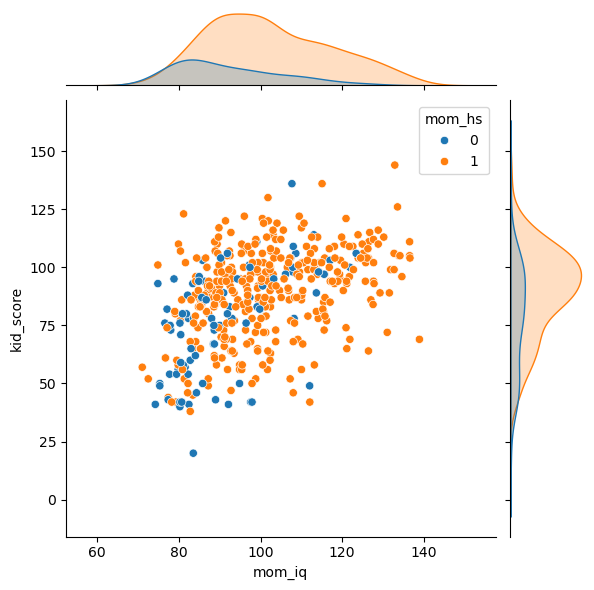

In [10]:
sns.jointplot(data_df, x="mom_iq", y="kid_score", hue="mom_hs")

## 1.2. Accessing the model

In [11]:
p_model.information

{'name': 'kidscore_momhsiq',
 'keywords': ['ARM', 'Ch. 3', 'stan_examples'],
 'title': 'Multiple Predictors Linear Model',
 'prior': {'keywords': 'stan_recommended_35dbfe6'},
 'description': 'kid_score ~ mom_hs + mom_iq',
 'urls': 'https://raw.githubusercontent.com/stan-dev/example-models/master/ARM/Ch.3/kidiq_multi_preds.stan',
 'references': 'gelman2006data',
 'added_date': '2020-01-13',
 'added_by': 'Oliver Järnefelt'}

In [12]:
print(p_model.stan_code())

data {
  int<lower=0> N;
  vector<lower=0, upper=200>[N] kid_score;
  vector<lower=0, upper=200>[N] mom_iq;
  vector<lower=0, upper=1>[N] mom_hs;
}
parameters {
  vector[3] beta;
  real<lower=0> sigma;
}
model {
  sigma ~ cauchy(0, 2.5);
  kid_score ~ normal(beta[1] + beta[2] * mom_hs + beta[3] * mom_iq, sigma);
}





# 1.3. Accessing the posterior

In [13]:
posterior.information

{'keywords': ['arm book', 'stan examples'],
 'urls': 'https://github.com/stan-dev/example-models/tree/master/ARM/Ch.3',
 'references': 'gelman2006data',
 'dimensions': {'beta': 3, 'sigma': 1},
 'added_date': '2020-01-13',
 'added_by': 'Oliver Järnefelt'}

In [14]:
posterior.name

'kidiq-kidscore_momhsiq'

In [15]:
posterior.reference_draws_info()['inference']

{'method': 'stan_sampling',
 'method_arguments': {'chains': 10,
  'iter': 20000,
  'warmup': 10000,
  'thin': 10,
  'seed': 4711,
  'control': {'adapt_delta': 0.8}}}

In [16]:
posterior.reference_draws_info()["diagnostics"]

{'diagnostic_information': {'names': ['beta[1]',
   'beta[2]',
   'beta[3]',
   'sigma']},
 'ndraws': 10000,
 'nchains': 10,
 'effective_sample_size_bulk': [10261.1339699153,
  10231.4957351984,
  10250.2853386041,
  10062.1856671618],
 'effective_sample_size_tail': [10079.2391372892,
  9953.80983922285,
  10074.5986042733,
  9914.740345211],
 'r_hat': [0.999869000404669,
  1.00011735563098,
  0.999836416246855,
  1.00053606689533],
 'divergent_transitions': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'expected_fraction_of_missing_information': [1.96606679499034,
  2.06176484692665,
  2.05598322842441,
  1.90234956255607,
  2.03136969985891,
  2.00916989171201,
  2.06417949120362,
  1.99690889413627,
  2.0089226830519,
  1.96529260910074]}

Convergence diagnostic $\hat{R}$ is used: https://doi.org/10.1214/20-BA1221

In [17]:
reference_draws = posterior.reference_draws()
len(reference_draws)

10

Data structure:

[

    {                     - chain1
        param1: [...], 
        param2: [...], 
        ...
    },
    
    {...},                - chain2,

    ...
    
    {...}                 - chain10
]

In [18]:
reference_draws[0].keys()

dict_keys(['beta[1]', 'beta[2]', 'beta[3]', 'sigma'])

In [19]:
# Combine all chain draws into a single DataFrame and add chain identifier
reference_draws_df = pd.concat([
    pd.DataFrame(chain_draw).assign(chain_id=i) 
    for i, chain_draw in enumerate(reference_draws)
])

# reference_draws_df["step"] = reference_draws_df.index

# Rename beta columns to adjust the indices for later usage
reference_draws_df.rename(columns={f"beta[{i+1}]": f"beta[{i}]" for i in range(3)}, inplace=True)

reference_draws_df

,beta[0],beta[1],beta[2],sigma,chain_id
0,43.315341,8.028461,0.374428,18.292501,0
1,23.388870,8.122381,0.551708,18.008244,0
2,23.518381,6.336248,0.592277,17.495827,0
3,26.799274,0.563804,0.599978,18.646986,0
4,26.779357,4.544044,0.556359,18.209594,0
...,...,...,...,...,...
995,26.776659,7.201880,0.534026,17.539622,9
996,25.078451,9.037136,0.543398,18.289046,9
997,27.018337,6.410937,0.546191,17.484793,9
998,21.825134,8.081853,0.582130,18.692422,9


In [20]:
reference_draws_df.describe()

,beta[0],beta[1],beta[2],sigma,chain_id
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.794115,5.987432,0.562994,18.139194,4.500000
std,5.860621,2.216019,0.060466,0.618526,2.872425
min,5.379161,-2.125778,0.338212,15.693816,0.000000
25%,21.910704,4.481625,0.522379,17.714820,2.000000
50%,25.826163,5.981016,0.562683,18.119150,4.500000
75%,29.692561,7.488505,0.603111,18.542002,7.000000
max,47.632699,13.754934,0.787924,20.710710,9.000000


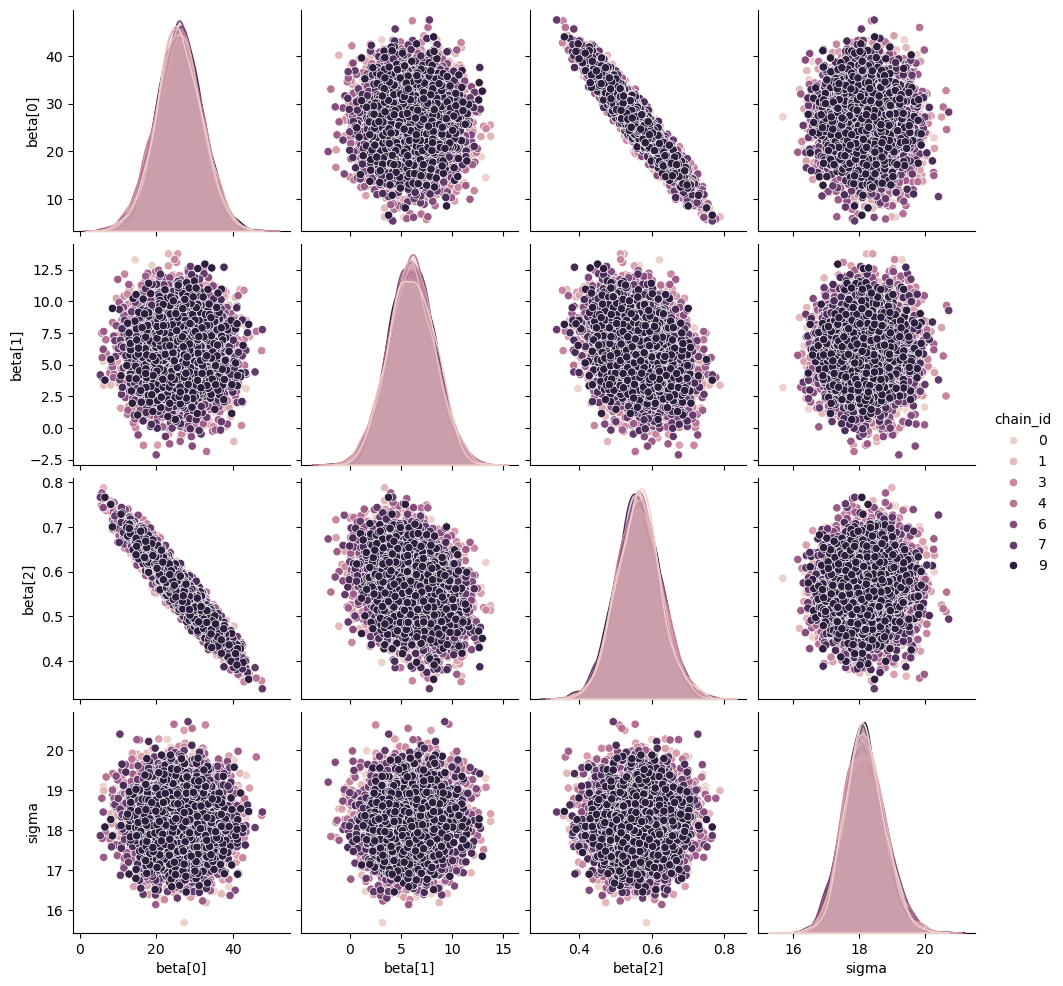

In [21]:
sns.pairplot(reference_draws_df, vars=["beta[0]", "beta[1]", "beta[2]", "sigma"], hue="chain_id")

In [22]:
# sns.scatterplot(reference_draws_df, x=reference_draws_df.index, y="sigma", marker='.')

In [23]:
reference_draws_df.drop(columns=["chain_id"], inplace=True)

# 2.NumPyro

In [99]:
import numpyro
import numpyro.distributions as dist
import numpyro.infer as infer
from jax import random
from ARWMH import ARWMH

In [102]:
print(p_model.stan_code())

data {
  int<lower=0> N;
  vector<lower=0, upper=200>[N] kid_score;
  vector<lower=0, upper=200>[N] mom_iq;
  vector<lower=0, upper=1>[N] mom_hs;
}
parameters {
  vector[3] beta;
  real<lower=0> sigma;
}
model {
  sigma ~ cauchy(0, 2.5);
  kid_score ~ normal(beta[1] + beta[2] * mom_hs + beta[3] * mom_iq, sigma);
}





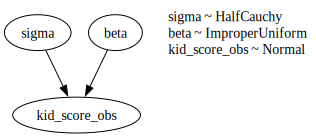

In [103]:
def model(mom_iq, mom_hs, kid_score=None):
    
    # Priors
    sigma = numpyro.sample("sigma", dist.HalfCauchy(2.5))
    beta = numpyro.sample("beta", dist.ImproperUniform(dist.constraints.real_vector, (), event_shape=(3,)))
    
    # Linear model
    mu = beta[0] + beta[1] * mom_hs + beta[2] * mom_iq
    
    numpyro.sample("kid_score_obs", dist.Normal(mu, sigma), obs=kid_score)

    # Reparametrisation (in case of complex models)
    # with numpyro.handlers.reparam(config={"kid_score_obs": numpyro.infer.reparam.TransformReparam()}):
    #     numpyro.sample(
    #         "kid_score_obs", 
    #         dist.TransformedDistribution(
    #             dist.Normal(0., 1.), 
    #             dist.transforms.AffineTransform(mu, sigma)
    #         ), 
    #         obs=kid_score
    #     )

infer.inspect.render_model(model, model_args=(data_df["mom_iq"].array, data_df["mom_hs"].array), render_distributions=True)

In [155]:
from collections import namedtuple
import jax
from jax.flatten_util import ravel_pytree
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
from numpyro.infer.util import initialize_model
from numpyro.infer.initialization import init_to_uniform


# Define state for ARWMH
ARWMHState = namedtuple(
    "ARWMHState",
    [
        "i",  # Iteration
        "z",  # Current Point
        "potential_energy",  # Current potential energy
        "accept_prob",  # Acceptance probability of the last step
        "mean_accept_prob",  # Running mean of acceptance probabilities
        "adapt_state",  # Mean estimate & Covariance matrix estimate
        "rng_key",  # Random number generator state
    ],
)

class ARWMH(numpyro.infer.mcmc.MCMCKernel):
    sample_field = "z"  # Field representing the MCMC sample

    def __init__(
        self, model=None, potential_fn=None, step_size=1.0, init_strategy=init_to_uniform
    ):
        """
        :param model: Optional model to initialize the kernel.
        :param potential_fn: A callable representing the negative log-posterior density.
        :param step_size: Adaptation update
        :param callable init_strategy: a per-site initialization function.
        """
        if not (model is None) ^ (potential_fn is None):
            raise ValueError("Only one of `model` or `potential_fn` must be specified.")
        self._model = model
        self._potential_fn = potential_fn
        self._step_size = step_size
        self._postprocess_fn = None
        self._init_strategy = init_strategy

    @property
    def model(self):
        return self._model

    def init(self, rng_key, num_warmup, init_params, model_args, model_kwargs):
        """
        Initialize the ARWMH kernel state.

        :param rng_key: Random number generator key.
        :param num_warmup: Number of warmup iterations.
        :param init_params: Initial parameters for the chain.
        :param model_args: Arguments for the model.
        :param model_kwargs: Keyword arguments for the model.
        :return: Initial ARWMHState.
        """
        self._num_warmup = num_warmup

        if self._model is not None:
            (
                params_info,
                potential_fn_gen,
                self._postprocess_fn,
                model_trace,
            ) = initialize_model(
                rng_key,
                self._model,
                init_strategy=self._init_strategy,
                dynamic_args=True,
                model_args=model_args,
                model_kwargs=model_kwargs,
            )
            init_params = params_info[0]
            model_kwargs = {} if model_kwargs is None else model_kwargs
            self._potential_fn = potential_fn_gen(*model_args, **model_kwargs)

        if self._potential_fn and init_params is None:
            raise ValueError(
                "Valid value of `init_params` must be provided with `potential_fn`."
            )

        potential_energy = self._potential_fn(init_params)
        
        mu_hat = ravel_pytree(init_params)[0]
        sigma_hat = jnp.eye(len(mu_hat)) * self._step_size
        adapt_state = (mu_hat, sigma_hat)

        init_state = ARWMHState(
            i=jnp.array(0),
            z=init_params,
            potential_energy=potential_energy,
            accept_prob=jnp.zeros(()),
            mean_accept_prob=jnp.zeros(()),
            adapt_state=adapt_state,
            rng_key=rng_key,
        )

        return jax.device_put(init_state)


    def sample(self, state, model_args, model_kwargs):
        """
        Generate the next sample using the adaptive random walk kernel.

        :param state: Current ARWMHState.
        :param model_args: Arguments for the model.
        :param model_kwargs: Keyword arguments for the model.
        :return: Updated ARWMHState.
        """
        i, z, potential_energy, _, mean_accept_prob, adapt_state, rng_key = state
        mu_hat, sigma_hat = adapt_state

        # Flatten a pytree of arrays down to a 1D array.
        z_flat, unravel_fn = ravel_pytree(z)
        
        # Split RNG for proposal and acceptance
        rng_key, key_proposal, key_accept = jax.random.split(rng_key, 3)

        # Propose a new sample
        z_proposal_flat = dist.MultivariateNormal(z_flat, self._step_size * sigma_hat + jnp.eye(len(z_flat)) * 1e-6).sample(key_proposal)
        z_proposal = unravel_fn(z_proposal_flat)
        potential_energy_proposal = self._potential_fn(z_proposal)

        # Compute acceptance probability
        accept_prob = jnp.clip(jnp.exp(potential_energy - potential_energy_proposal), min=None, max=1)
        is_accepted = dist.Uniform().sample(key_accept) < accept_prob

        # Update state based on acceptance
        z_new_flat = jnp.where(is_accepted, z_proposal_flat, z_flat)
        z_new = unravel_fn(z_new_flat)
        potential_energy_new = jnp.where(is_accepted, potential_energy_proposal, potential_energy)

        # # do not update adapt_state after warmup phase
        # adapt_state = jax.lax.cond(
        #     i < self._num_warmup,
        #     (i, accept_prob, (x,), adapt_state),
        #     lambda args: self._wa_update(*args),
        #     adapt_state,
        #     identity,
        # )

        # itr = i + 1
        # n = jnp.where(i < self._num_warmup, itr, itr - self._num_warmup)

        # Update mean and covariance (adaptation step)
        eta = 1 / (i+1)
        delta = z_new_flat - mu_hat
        mu_new = mu_hat + eta * delta
        sigma_new = sigma_hat + eta *(jnp.outer(delta, delta) - sigma_hat)
        adapt_state_new = (mu_new, sigma_new)

        # Update running mean of acceptance probabilities
        mean_accept_prob_new = mean_accept_prob + eta * (accept_prob - mean_accept_prob)

        return ARWMHState(
            i=i + 1,
            z=z_new,
            potential_energy=potential_energy_new,
            accept_prob=accept_prob,
            mean_accept_prob=mean_accept_prob_new,
            adapt_state=adapt_state_new,
            rng_key=rng_key,
        )

    def get_diagnostics_str(self, state):
        """
        Return diagnostics string for progress monitoring.

        :param state: Current ARWMHState.
        :return: Diagnostics string.
        """
        return f"Acceptance rate: {state.mean_accept_prob:.2f}"


In [156]:
kernel = ARWMH(model, step_size=100.0)
mcmc = infer.MCMC(kernel, num_warmup=10000, num_samples=10000)
rng_key = jax.random.PRNGKey(0)

mcmc.run(rng_key,
         mom_iq=data_df["mom_iq"].array, mom_hs=data_df["mom_hs"].array, kid_score=data_df["kid_score"].array, 
         extra_fields=("potential_energy", "mean_accept_prob")
        )

sample: 100%|████████████████████████| 20000/20000 [00:01<00:00, 12588.32it/s, Acceptance rate: nan]


In [157]:
posterior_samples = mcmc.get_samples()
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
   beta[0]      0.80      0.00      0.80      0.80      0.80      1.00      1.00
   beta[1]      1.85      0.00      1.85      1.85      1.85      1.00      1.00
   beta[2]      0.83      0.00      0.83      0.83      0.83      1.00      1.00
     sigma      2.93      0.00      2.93      2.93      2.93      1.00      1.00



In [158]:
posterior_samples_df = pd.DataFrame({
    "beta[0]": posterior_samples["beta"][:,0],
    "beta[1]": posterior_samples["beta"][:,1],
    "beta[2]": posterior_samples["beta"][:,2],
    "sigma": posterior_samples["sigma"]
})

# posterior_samples_df["step"] = posterior_samples_df.index

posterior_samples_df

,beta[0],beta[1],beta[2],sigma
0,0.801012,1.848287,0.830693,2.928971
1,0.801012,1.848287,0.830693,2.928971
2,0.801012,1.848287,0.830693,2.928971
3,0.801012,1.848287,0.830693,2.928971
4,0.801012,1.848287,0.830693,2.928971
...,...,...,...,...
9995,0.801012,1.848287,0.830693,2.928971
9996,0.801012,1.848287,0.830693,2.928971
9997,0.801012,1.848287,0.830693,2.928971
9998,0.801012,1.848287,0.830693,2.928971


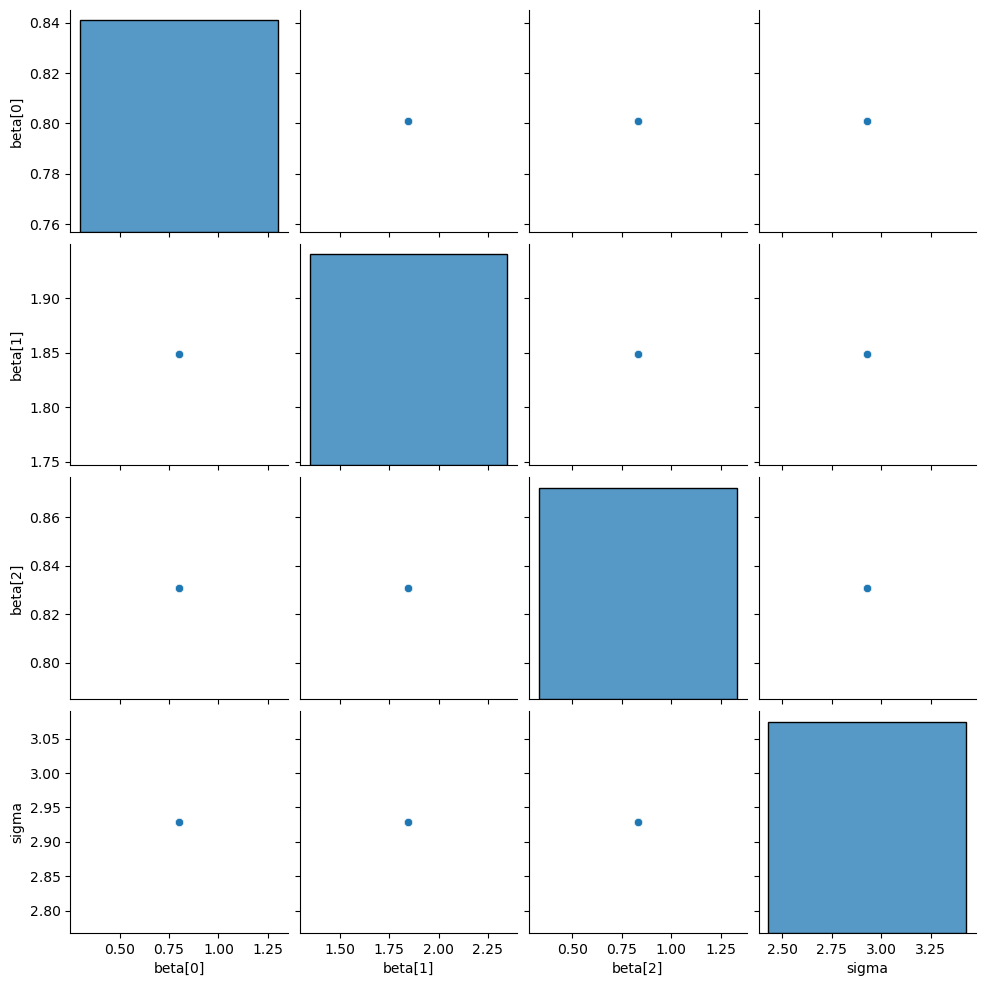

In [159]:
sns.pairplot(posterior_samples_df, vars=["beta[0]", "beta[1]", "beta[2]", "sigma"])

<Axes: xlabel='None', ylabel='sigma'>

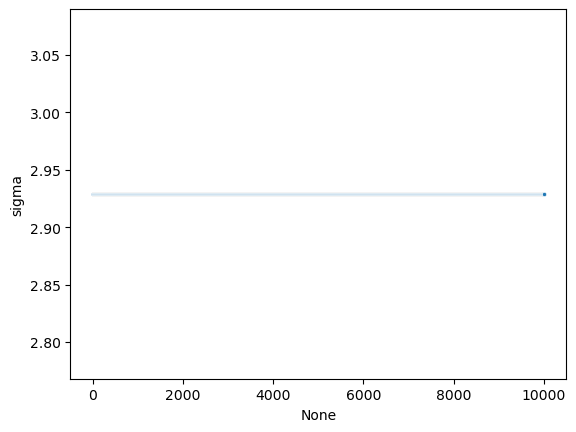

In [160]:
sns.scatterplot(posterior_samples_df, x=posterior_samples_df.index, y="sigma", marker='.')

# 3. Evaluation

In [113]:
combined_df = pd.concat([
    reference_draws_df.assign(source = "reference"),
    posterior_samples_df.assign(source = "samples"),
])

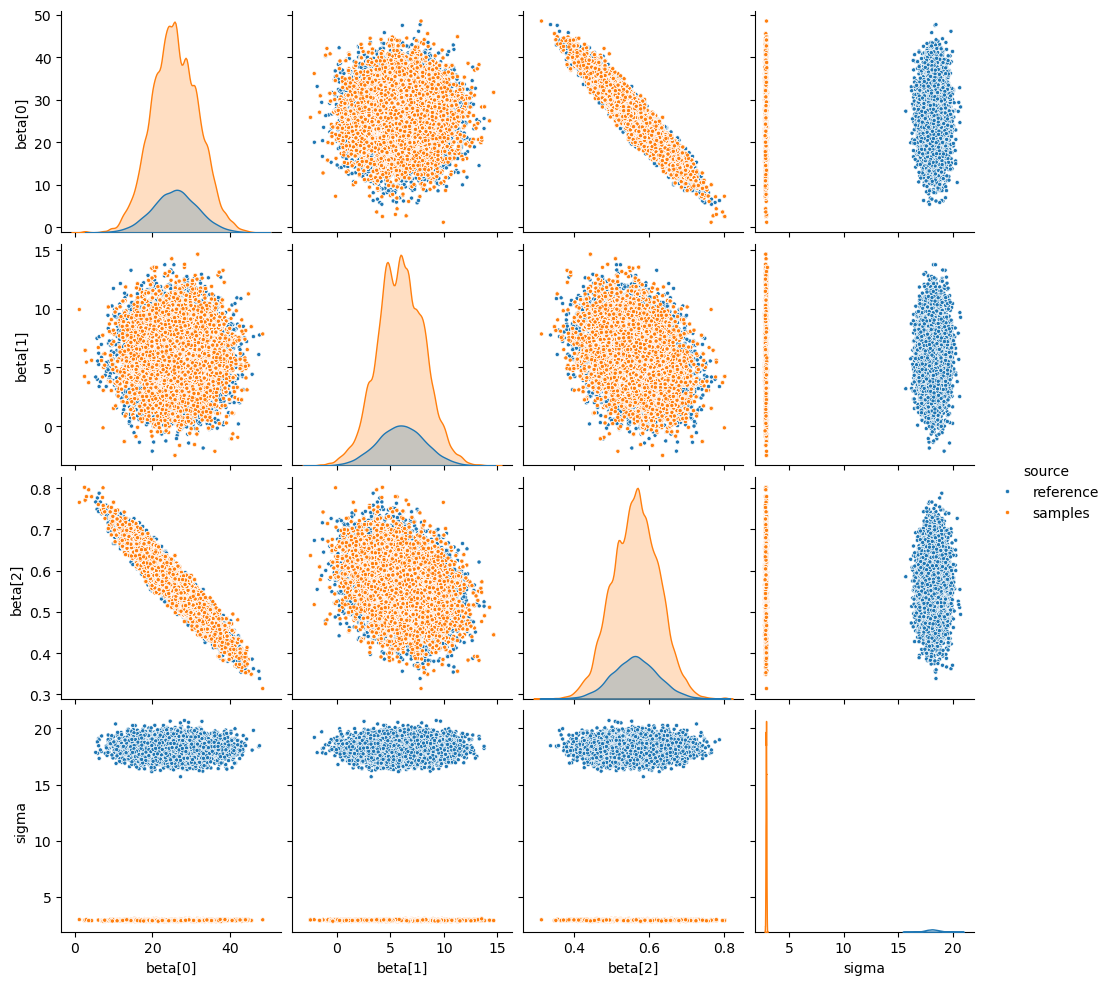

In [114]:
sns.pairplot(combined_df, hue="source", markers=".")

## 3.1. Moments 

In [115]:
p = 2

pth_moments = combined_df.groupby("source").aggregate(lambda vals: np.mean(vals**p)).transpose().rename_axis(f"E[|X|^{p}]")
pth_moments["% diff"] = np.abs(pth_moments["reference"] - pth_moments["samples"])/(pth_moments["reference"])*100

pth_moments

source,reference,samples,% diff
E[|X|^2],,,
beta[0],699.679786,698.917837,0.108900
beta[1],40.759592,39.818183,2.309663
beta[2],0.320618,0.321592,0.303983
sigma,329.412899,8.396557,97.451054


## 3.2. Wasserstein-1 Distance

$$ \mathcal{W}(u, v) = \inf_{\xi \in \mathcal{C} (u, v)} \int \| x-y \|_2 \xi (dx,dy) $$


In [150]:
from scipy.stats import wasserstein_distance_nd

In [ ]:
%%time
wasserstein_distance_nd(posterior_samples_df.values[:1000], reference_draws_df.values[:1000])

## 3.3. Maximum Mean Discrepancy

Given a symmetric, positive-definite kernel kernel $k(\cdot,\cdot): \mathcal{X} \times \mathcal{X} \to \mathbb{R}$, 
the MMD between distributions $P$ and $Q$ is given by

$$ MMD(P, Q)^2 = \int_{\mathcal{X} \times \mathcal{X}} k(x, x') P(dx)P(dx') + \int_{\mathcal{X} \times \mathcal{X}} k(y, y') Q(dy)Q(dy') - 2\int_{\mathcal{X} \times \mathcal{X}} k(x, y) P(dx)Q(dy) $$

Usually Gaussian kernel is used with

$$ k(x,y) := \exp \left( -\frac{\| x-y \|^2}{ \ell^2 } \right) $$.


In [48]:
from sklearn.metrics.pairwise import rbf_kernel

def mmd(p, q, l=1.0):
    P = rbf_kernel(p, gamma=1/l**2)
    Q = rbf_kernel(q, gamma=1/l**2)
    PQ = rbf_kernel(p, q, gamma=1/l**2)
    mmd = np.mean(P) + np.mean(Q) - 2*np.mean(PQ)
    return mmd

In [47]:
%%time
mmd(posterior_samples_df.values, reference_draws_df.values).item()

CPU times: user 5.9 s, sys: 5.87 s, total: 11.8 s
Wall time: 2.53 s


0.0002608555147775894

## 3.4. Pareto-$\hat{k}$ diagnostic

See https://arxiv.org/abs/1507.02646